In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host='localhost',
                           username='root',
                           password='Ganesh@22',
                           database='eCommerce'
                           )
cur=db.cursor()




# List all cities where customers are Located 


In [24]:
query=""" select distinct (customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders placed in 2017

In [4]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
data[0][0]


45101

# Find the total sales per category

In [5]:
query="""select upper(products.product_category) category, 
         round(sum(payments.payment_value),2) sales
        from products 
        join order_items on products.product_id=order_items.product_id
        join payments on payments.order_id=order_items.order_id
        group by category  """
cur.execute(query)
data=cur.fetchall()
data 
df=pd.DataFrame(data,columns=["category","sales"])
df



,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments 

In [11]:
query= """select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
"the percentage of order that were paid in installments is",data

('the percentage of order that were paid in installments is',
 [(Decimal('99.9981'),)])

# Counting number of customers from each  state

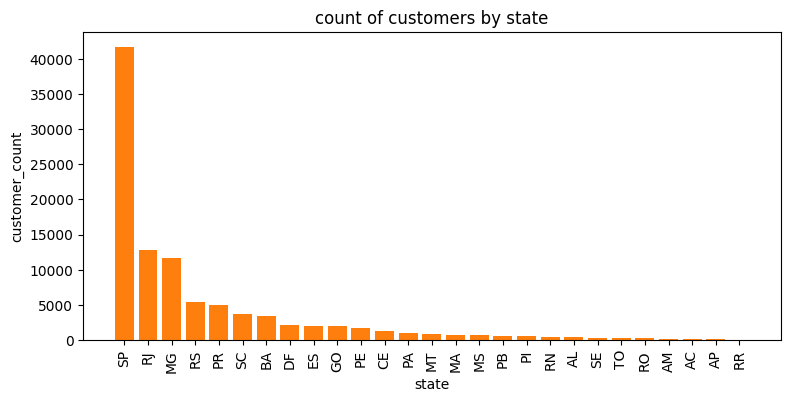

In [52]:
query= """select customer_state,count(customer_id)
from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["state","customer_count"])
df=df.sort_values(by ="customer_count",ascending=False)
plt.figure(figsize=(9,4))
sns.barplot(x=df["state"],y=df["customer_count"],data=df, )
plt.title("count of customers by state")


plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

# Calculate the number of orders per month in 2018

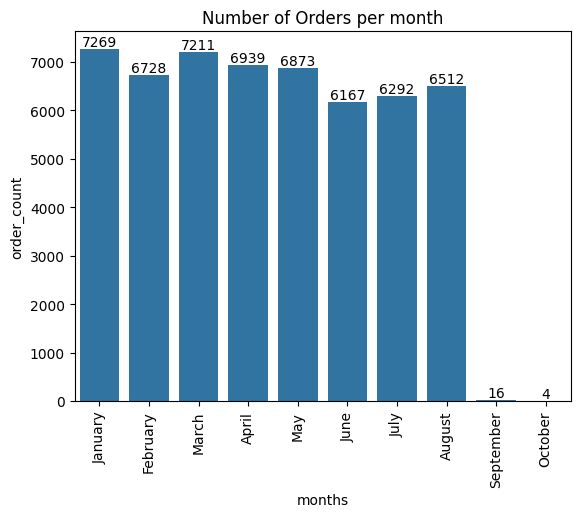

In [55]:
query= """select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
o=["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df, order=o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Number of Orders per month")
plt.show()
